# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# my imports below...


import json

# Import API key
from mmapi_keys import openwm_api_key

# Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy

# WAS --> from citipy import citipy 
# but got error: ImportError: cannot import name 'citipy' from 'citipy' 
# (C:\Users\Michel Maniguet\Desktop\HW6-pAPIs\citipy.py)
# in citipy.py there is no "citipy" to import. 
import citipy # changed it to this and no error.... so far. Did they intentionally mess me up??

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name # get nearest city
    # print(f"city: {city}, coordinates = {lat_lng[0]}, {lat_lng[1]}")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up the url

# url = "https://api.openweathermap.org/data/2.5/weather?q=London,uk&appid=YOUR_API_KEY 

baseurl = "https://api.openweathermap.org/data/2.5/weather?q=" #{city} London,uk&appid=YOUR_API_KEY 

citycount = 0
cityerrorcount = 0
citycountmax = 600
city_data_line = []
all_city_lines = []

print("Headings: City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed")

# output_data_file = "output_data/cities.csv"

for city in cities:
    url = baseurl + f"{city}&appid={openwm_api_key}"
    response = requests.get(url)
    # print(f"Got {response} from API when accessing {city}")
    resp_data = response.json()
    # print(json.dumps(resp_data, indent=4))
    # Line Headings: City, Cloudiness, Country, Date, Humidity, Latitude, Longitude, Max Temp, Wind Speed
    response_code = resp_data["cod"]
    if response_code == 200:
        city = resp_data["name"]
        print(f"processing data for {city}...",end="")
        cloud = resp_data["clouds"]["all"]
        country = resp_data["sys"]["country"]
        date = resp_data["dt"]
        humid = resp_data["main"]["humidity"]
        lat = resp_data["coord"]["lat"]
        lng = resp_data["coord"]["lon"]
        maxtemp = resp_data["main"]["temp_max"]
        maxtemp = maxtemp - 273.15 # convert from Kelvin to Celcius
        maxtemp = f"{float(maxtemp):.3}"  # this problem why i am getting BOTH: excessive tick amkrsk & bad/random data
        maxtemp = float(maxtemp)
        wind = resp_data["wind"]["speed"]

        city_data_line = [city,cloud,country,date,humid,lat,lng,maxtemp,wind]
        print(f" data: {city_data_line}")
        all_city_lines.append(city_data_line)
    else:
        print(f"Got response code {response_code} when fetching data for {city}")
        cityerrorcount += 1
    citycount += 1
    if citycount > citycountmax:
        break
# print(json.dumps(all_city_lines, indent=5))  --> NOTE: this acts wierd bc all_city_lines is a list not a JSON!!!


Headings: City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed
processing data for Cape Canaveral... data: ['Cape Canaveral', 1, 'US', 1553390214, 77, 28.41, -80.6, 19.4, 2.1]
processing data for Albany... data: ['Albany', 1, 'US', 1553390341, 43, 42.65, -73.75, 0.56, 4.6]
processing data for Tautira... data: ['Tautira', 40, 'PF', 1553389987, 70, -17.73, -149.15, 31.0, 7.2]
processing data for Yellowknife... data: ['Yellowknife', 20, 'CA', 1553390257, 47, 62.45, -114.38, -11.0, 4.6]
processing data for Paamiut... data: ['Paamiut', 20, 'GL', 1553390178, 100, 61.99, -49.67, -6.84, 4.81]
processing data for Punta Arenas... data: ['Punta Arenas', 75, 'CL', 1553389991, 87, -53.16, -70.91, 11.7, 1.5]
processing data for Saint-Philippe... data: ['Saint-Philippe', 1, 'CA', 1553390187, 50, 45.36, -73.48, 0.0, 7.2]
processing data for Pozo Colorado... data: ['Pozo Colorado', 56, 'PY', 1553390379, 71, -23.49, -58.8, 25.1, 2.16]
Got response code 404 when fetching data for vai

processing data for Aklavik... data: ['Aklavik', 20, 'CA', 1553389200, 62, 68.22, -135.01, -5.0, 5.7]
processing data for Leninskoye... data: ['Leninskoye', 0, 'RU', 1553387400, 90, 54.82, 82.85, 0.0, 3]
processing data for Georgetown... data: ['Georgetown', 20, 'GY', 1553385600, 74, 6.8, -58.16, 28.0, 4.1]
processing data for Codrington... data: ['Codrington', 40, 'AU', 1553390130, 66, -28.95, 153.24, 31.1, 1.5]
Got response code 404 when fetching data for amderma
processing data for Saldanha... data: ['Saldanha', 0, 'PT', 1553390305, 68, 41.42, -6.55, 7.11, 2.21]
processing data for Skjervoy... data: ['Skjervoy', 92, 'NO', 1553390414, 100, 70.03, 20.97, 1.91, 3.46]
processing data for Pingshan... data: ['Pingshan', 92, 'CN', 1553390415, 76, 28.83, 104.35, 9.11, 1.86]
processing data for Avarua... data: ['Avarua', 76, 'CK', 1553387400, 94, -21.21, -159.78, 26.0, 7.2]
processing data for Hobart... data: ['Hobart', 20, 'AU', 1553390415, 64, -42.88, 147.33, 21.1, 4.6]
processing data for

processing data for Hambantota... data: ['Hambantota', 0, 'LK', 1553386200, 100, 6.12, 81.12, 23.0, 1.5]
processing data for Vaini... data: ['Vaini', 0, 'IN', 1553385600, 60, 15.34, 74.49, 20.0, 0.41]
processing data for Fasa... data: ['Fasa', 90, 'IR', 1553385600, 100, 28.94, 53.65, 9.0, 1.21]
processing data for Koshurnikovo... data: ['Koshurnikovo', 68, 'RU', 1553390447, 86, 54.3, 93.39, -4.44, 1.01]
processing data for Emerald... data: ['Emerald', 40, 'AU', 1553390187, 62, -23.53, 148.16, 30.0, 2.6]
processing data for Inhambane... data: ['Inhambane', 68, 'MZ', 1553390168, 90, -23.87, 35.38, 25.1, 5.11]
processing data for Dejen... data: ['Dejen', 0, 'ET', 1553390448, 62, 10.16, 38.15, 14.6, 0.71]
processing data for Cabo San Lucas... data: ['Cabo San Lucas', 5, 'MX', 1553390220, 53, 22.89, -109.91, 24.0, 3.6]
processing data for Gornopravdinsk... data: ['Gornopravdinsk', 64, 'RU', 1553390449, 89, 60.06, 69.92, -2.49, 1.51]
processing data for Kadaya... data: ['Kadaya', 0, 'RU', 15

processing data for Kapaa... data: ['Kapaa', 90, 'US', 1553390297, 78, 22.08, -159.32, 26.0, 7.7]
processing data for Laguna... data: ['Laguna', 0, 'MX', 1553390483, 21, 27.52, -110.01, 28.7, 2.61]
processing data for Tuatapere... data: ['Tuatapere', 68, 'NZ', 1553390224, 72, -46.13, 167.69, 19.5, 3.86]
processing data for Coria... data: ['Coria', 0, 'ES', 1553390351, 57, 39.98, -6.54, 13.3, 2.24]
processing data for Mayo... data: ['Mayo', 75, 'CA', 1553389200, 30, 63.59, -135.9, 15.0, 3.1]
processing data for Pacific Grove... data: ['Pacific Grove', 40, 'US', 1553390482, 58, 36.62, -121.92, 17.0, 4.6]
Got response code 404 when fetching data for pafos
processing data for Victoria... data: ['Victoria', 75, 'BN', 1553387400, 88, 5.28, 115.24, 28.0, 1.96]
processing data for Lumeje... data: ['Lumeje', 24, 'AO', 1553390486, 66, -11.56, 20.78, 21.8, 3.11]
processing data for Choya... data: ['Choya', 12, 'RU', 1553390487, 59, 52.01, 86.55, -8.69, 0.96]
Got response code 404 when fetching da

Got response code 404 when fetching data for tsihombe
Got response code 404 when fetching data for kazalinsk
processing data for Bulungu... data: ['Bulungu', 92, 'CD', 1553390520, 97, -4.54, 18.6, 21.7, 2.66]
processing data for Yarensk... data: ['Yarensk', 88, 'RU', 1553390521, 88, 62.17, 49.09, -0.391, 4.61]
processing data for Talnakh... data: ['Talnakh', 64, 'RU', 1553390412, 81, 69.49, 88.39, -14.7, 2.76]
processing data for Lucapa... data: ['Lucapa', 56, 'AO', 1553390521, 94, -8.42, 20.74, 20.6, 1.21]
processing data for Cayenne... data: ['Cayenne', 20, 'GF', 1553387400, 83, 4.94, -52.33, 26.0, 2.1]
processing data for Wattegama... data: ['Wattegama', 56, 'LK', 1553390522, 87, 7.35, 80.68, 19.2, 1.16]
processing data for Belmonte... data: ['Belmonte', 0, 'PT', 1553390318, 53, 40.36, -7.35, 12.8, 0.45]
processing data for Bathsheba... data: ['Bathsheba', 40, 'BB', 1553385600, 74, 13.22, -59.52, 26.0, 8.2]
processing data for Seoul... data: ['Seoul', 1, 'KR', 1553388600, 55, 37.57,

processing data for Lethem... data: ['Lethem', 0, 'GY', 1553390564, 41, 3.38, -59.8, 31.5, 6.86]
processing data for Olean... data: ['Olean', 1, 'US', 1553390413, 54, 42.08, -78.43, -0.56, 3.6]
processing data for Hovd... data: ['Hovd', 75, 'NO', 1553390465, 64, 63.83, 10.7, 3.89, 11.8]
processing data for Linjiang... data: ['Linjiang', 0, 'CN', 1553390566, 59, 41.81, 126.91, -2.14, 4.71]
processing data for Clyde River... data: ['Clyde River', 90, 'CA', 1553389200, 75, 70.47, -68.59, -26.0, 8.2]
Got response code 404 when fetching data for warqla
Got response code 404 when fetching data for kerki
processing data for Anloga... data: ['Anloga', 20, 'GH', 1553389200, 83, 5.79, 0.9, 28.0, 4.6]
processing data for Belturbet... data: ['Belturbet', 8, 'GB', 1553390404, 79, 54.1, -7.44, 5.0, 3.31]
processing data for Portland... data: ['Portland', 40, 'US', 1553390428, 50, 45.52, -122.67, 14.4, 4.6]
processing data for Bollnas... data: ['Bollnas', 0, 'SE', 1553390569, 50, 61.35, 16.39, 1.71, 

processing data for Roald... data: ['Roald', 40, 'NO', 1553390404, 75, 62.58, 6.12, 5.0, 9.3]
processing data for Evensk... data: ['Evensk', 0, 'RU', 1553390603, 89, 61.92, 159.24, -3.19, 5.86]
Got response code 404 when fetching data for andenes
processing data for Kendallville... data: ['Kendallville', 1, 'US', 1553391300, 41, 41.44, -85.27, 5.0, 2.01]
processing data for Ouallam... data: ['Ouallam', 80, 'NE', 1553390604, 16, 14.32, 2.08, 26.5, 3.96]
processing data for Nizhneudinsk... data: ['Nizhneudinsk', 88, 'RU', 1553390604, 81, 54.91, 99.03, -1.99, 1.21]
processing data for Sur... data: ['Sur', 12, 'OM', 1553390317, 95, 22.57, 59.53, 22.3, 2.31]
processing data for Broken Hill... data: ['Broken Hill', 75, 'AU', 1553385600, 88, -31.97, 141.45, 20.0, 6.7]
processing data for Kumluca... data: ['Kumluca', 0, 'TR', 1553390606, 75, 36.37, 30.29, 0.609, 0.96]
processing data for Sisimiut... data: ['Sisimiut', 64, 'GL', 1553390606, 82, 66.94, -53.67, -25.6, 0.81]
processing data for No

processing data for Bubaque... data: ['Bubaque', 8, 'GW', 1553390640, 100, 11.28, -15.83, 25.3, 6.11]
processing data for Mount Isa... data: ['Mount Isa', 90, 'AU', 1553387400, 74, -20.73, 139.49, 27.0, 9.3]
processing data for La Mira... data: ['La Mira', 0, 'MX', 1553390640, 73, 18.04, -102.33, 27.3, 4.36]
processing data for Santa Rosa... data: ['Santa Rosa', 0, 'AR', 1553387340, 28, -36.62, -64.29, 22.0, 4.1]
processing data for Bud... data: ['Bud', 75, 'NO', 1553390200, 100, 62.91, 6.91, 5.0, 6.7]
processing data for Dayong... data: ['Dayong', 20, 'PH', 1553390643, 100, 11.74, 122.04, 26.1, 9.71]
processing data for Port Hawkesbury... data: ['Port Hawkesbury', 90, 'CA', 1553390444, 91, 45.62, -61.36, 1.67, 6.7]
processing data for Muhos... data: ['Muhos', 68, 'FI', 1553390485, 59, 64.81, 26, 3.0, 8.7]
processing data for Novoagansk... data: ['Novoagansk', 92, 'RU', 1553390645, 96, 61.94, 76.66, -2.19, 1.61]
processing data for Kalevala... data: ['Kalevala', 0, 'FI', 1553390645, 78

In [12]:
# Indicate if we got all the data needed to meet the requirements
# if len(all_city_lines) > 500:
#     print("")
print(f"{citycount + cityerrorcount} API accesses were attempted.")
print(f"{cityerrorcount} city record access errors occurred.")
if citycount > 500:
    print(f"Requirement to exceed 500 city records has been satisfied with {citycount} successful records.")
else:
    print(f"Requirement to exceed 500 city records failed by {500 - citycount} records.")

#

663 API accesses were attempted.
62 city record access errors occurred.
Requirement to exceed 500 city records has been satisfied with 601 successful records.


### Convert Raw Data to DataFrame

create the dataframe

* Export the city data into a .csv.

* Display the DataFrame

In [13]:
# create the dataframe
all_city_lines_df = pd.DataFrame(all_city_lines)
all_city_data_with_headings_df \
    = all_city_lines_df.rename(columns=\
                               {0:"City", 1:"Cloudiness", 2:"Country", 3:"Date",\
                                4:"Humidity", 5:"Latitude", 6:"Longitude",\
                                7:"Max Temp (deg.C)", 8:"Wind Speed (km/hr)"})

##### I forgot how to add the header....????

# Export file as a CSV, without the Pandas index, but with the header
all_city_data_with_headings_df.to_csv(output_data_file, index=False, header=True)


#

In [14]:
all_city_data_with_headings_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp (deg.C),Wind Speed (km/hr)
0,Cape Canaveral,1,US,1553390214,77,28.41,-80.60,19.400,2.10
1,Albany,1,US,1553390341,43,42.65,-73.75,0.560,4.60
2,Tautira,40,PF,1553389987,70,-17.73,-149.15,31.000,7.20
3,Yellowknife,20,CA,1553390257,47,62.45,-114.38,-11.000,4.60
4,Paamiut,20,GL,1553390178,100,61.99,-49.67,-6.840,4.81
5,Punta Arenas,75,CL,1553389991,87,-53.16,-70.91,11.700,1.50
6,Saint-Philippe,1,CA,1553390187,50,45.36,-73.48,0.000,7.20
7,Pozo Colorado,56,PY,1553390379,71,-23.49,-58.80,25.100,2.16
8,Bluff,0,AU,1553390370,63,-23.58,149.07,28.800,2.51
9,Xiongyue,0,CN,1553390381,41,40.18,122.12,5.310,6.71


In [15]:
city_lati_df = all_city_data_with_headings_df["Latitude"]
city_temp_df = all_city_data_with_headings_df["Max Temp (deg.C)"]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

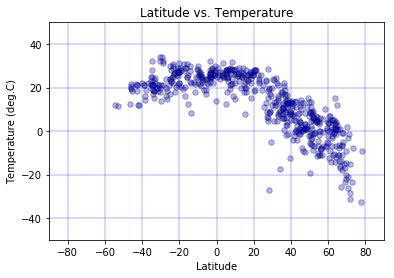

In [16]:
# plt.scatter(rural_ridecount, rural_avefare, s=8*rural_driver_count, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)

city_lati_df = all_city_data_with_headings_df["Latitude"]
city_temp_df = all_city_data_with_headings_df["Max Temp (deg.C)"]

# city_lati_df.values --> .values delects ont he data and excludes the index
# city_temp_df.values


plt.xlabel("Latitude")
plt.ylabel("Temperature (deg.C)")
plt.title("Latitude vs. Temperature")
# plt.scatter(city_lati_df.values,city_temp_df.values,s=50,marker='o',facecolors="blue",edgecolors="black",alpha=.3)
plt.scatter(city_lati_df.values,city_temp_df.values,s=30,marker='o',facecolors="blue",edgecolors="black",alpha=.3)
plt.xlim(-90,90)
plt.ylim(-50,50)
plt.grid(color='blue', axis='both', linestyle='-', linewidth=.3)
# plt.xticks([80,60,40,20,0,-20,-40,-60,-80])
#plt.yticks([-20,-10,0,10,20])
plt.savefig("HW6-LatvsTemp.png")

#### Latitude vs. Humidity Plot

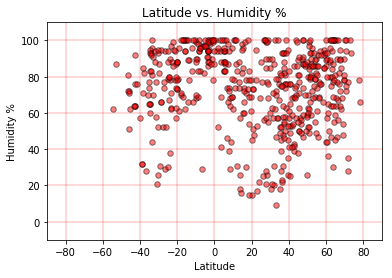

In [17]:

city_humi_df = all_city_data_with_headings_df["Humidity"]

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity %")
plt.scatter(city_lati_df,city_humi_df,s=30,marker='o',facecolors="red",edgecolors="black",alpha=.5)
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.grid(color='red', axis='both', linestyle='-', linewidth=.3)
plt.savefig("HW6-LatvsHumi.png")


#### Latitude vs. Cloudiness Plot

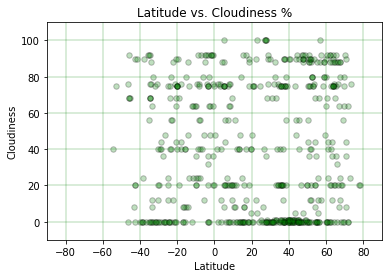

In [18]:
city_clou_df = all_city_data_with_headings_df["Cloudiness"]

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness %")
plt.scatter(city_lati_df,city_clou_df,s=30,marker='o',facecolors="green",edgecolors="black",alpha=.25)
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.grid(color='green', axis='both', linestyle='-', linewidth=.3)
plt.savefig("HW6-LatvsClou.png")


#### Latitude vs. Wind Speed Plot

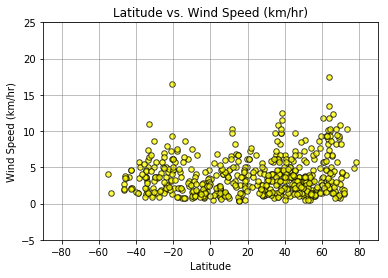

In [19]:
city_wind_df = all_city_data_with_headings_df["Wind Speed (km/hr)"]

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/hr)")
plt.title("Latitude vs. Wind Speed (km/hr)")
plt.scatter(city_lati_df,city_wind_df,s=30,marker='o',facecolors="yellow",edgecolors="black",alpha=.75)
plt.xlim(-90,90)
plt.ylim(-5,25)
plt.grid(color='gray', axis='both', linestyle='-', linewidth=.5)
plt.savefig("HW6-LatvsWind.png")
